## Importamos la librería pandas




In [1]:
import pandas as pd

## Cargamos Archivo que utilizaremos


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT3/master/data/Default.csv') 
data.default.sum()

333

## Creamos una función de mapeo

In [3]:
# convertimos 1 (yes a verde) y 0 (no a rojo)
def fn(x):
  if(x == 1):
    return 'r'
  else:
    return 'g'

## Graficamos el diagrama de Dispersión

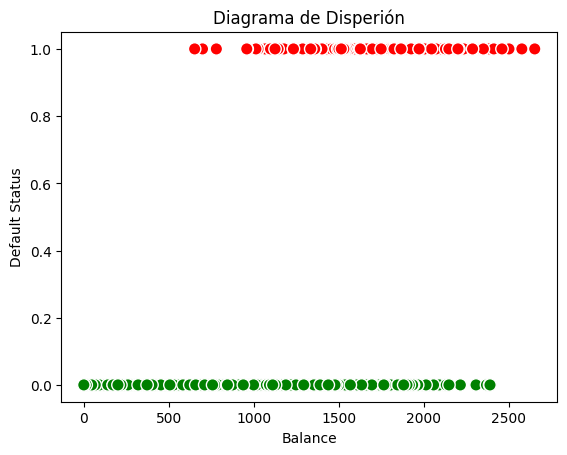

In [5]:
import matplotlib.pyplot as plt
mapeo = list(map(fn, data['default']))
plt.scatter(data['balance'], data['default'],  color=mapeo, edgecolors='white', s = 80)
plt.xlabel("Balance")
plt.ylabel("Default Status")
plt.title("Diagrama de Disperión")
plt.show()

## Creamos Modelo de Regresión Logística

In [6]:
Y = data['default'].values.reshape(-1)
X = data[['balance', 'income']].values.reshape(-1,2)
print('X = ', X.shape)
print('Y = ', Y.shape)

X =  (10000, 2)
Y =  (10000,)


In [7]:
from sklearn.linear_model import LogisticRegression 

## Realizamos remuestreo: train = 70% , test = 30%

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state = 123)

print('X train = ', train_X.shape)
print('Y train = ', train_Y.shape)
print('X test  = ', test_X.shape)
print('Y test  = ', test_Y.shape)

X train =  (7000, 2)
Y train =  (7000,)
X test  =  (3000, 2)
Y test  =  (3000,)


## Extraemos Variables Individuales

In [9]:
train_X_balance = train_X[:, 0].reshape(-1, 1)
test_X_balance = test_X[:, 0].reshape(-1, 1)
print('X train balance = ', train_X_balance.shape)
print('X test balance  = ', test_X_balance.shape)

X train balance =  (7000, 1)
X test balance  =  (3000, 1)


## Creamos Modelo de Regresión Logística: default ~ balance

In [10]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()  #objeto para manejar regresion lineal
logReg.fit(train_X_balance, train_Y)  #creamos modelo X y 

LogisticRegression()

In [11]:
b1 = logReg.coef_[0][0]
print('b1 = ', b1)

b1 =  0.005307182684258198


In [12]:
b0 = logReg.intercept_[0]
print('b0 = ', b0)

b0 =  -10.328152011661237


## Creamos una función que calcula la función Sigmoide

In [13]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-(b0 + b1 * x)))

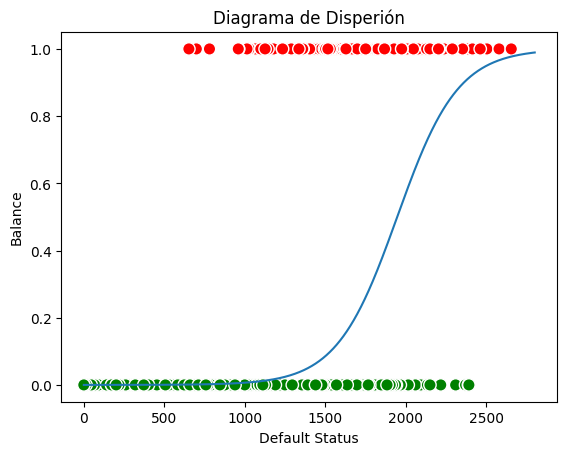

In [14]:
import numpy as np

X_preds = np.r_[0, 0:2800, 2800]
Y_preds = list(map(sigmoid, X_preds))
plt.plot(X_preds, Y_preds)
plt.scatter(data['balance'], data['default'],  color=mapeo, edgecolors='white', s = 80)
plt.xlabel("Default Status")
plt.ylabel("Balance")
plt.title("Diagrama de Disperión")
plt.show()

## Calculamos Predicciónes

In [15]:
predicciones = logReg.predict(test_X_balance)
predicciones

array([0, 0, 0, ..., 0, 0, 0])

## Calculamos la Matriz de Confusión

In [16]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(test_Y, predicciones, labels=[1, 0]).ravel()

print('TN =', tn)
print('FP =', fp)
print('FN =', fn)
print('TP =', tp)

TN = 26
FP = 72
FN = 7
TP = 2895


## Calculamos el Accuracy del modelo

In [19]:
acc = (tn + tp)/(tn + fp + fn + tp)
print("Accuracy: " + str(acc))


Accuracy: 0.9736666666666667


## Calculamos la Sensitividad del modelo

In [18]:
sencitivity = tp/(tp + fn)
print("Sencitivity: " + str(sencitivity))

Sencitivity: 0.9975878704341833


## Calculamos la Especificidad del modelo

In [17]:
specificity = tn/(tn + fp)
print("Specificity: " + str(specificity))

Specificity: 0.2653061224489796
